In [1]:
import pandas as pd
import numpy as np
import pickle as pkl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

import optuna

from tqdm.notebook import tqdm

In [2]:
tuna = True

In [3]:
df = pd.read_csv('data/premades/over_by_over_data.csv')

In [4]:
df[df['year'] == 2025].count()

Unnamed: 0                            2054
match_id                              2054
innings                               2054
over                                  2054
ball                                  2054
                                      ... 
bowl_team_top_bowler_4_bowling_sr     2054
bowl_team_top_bowler_4_economy        2054
bowl_team_top_bowler_5_bowling_avg    2054
bowl_team_top_bowler_5_bowling_sr     2054
bowl_team_top_bowler_5_economy        2054
Length: 65, dtype: int64

In [ ]:
X = df.drop(columns=['innings_total_score'])
y = df['innings_total_score']

X = X.apply(pd.to_numeric, errors='coerce')

# X = (X - X.mean()) / X.std()
# X = (X - X.min()) / (X.max() - X.min())

In [6]:
#find all the infinite values 
X = X.replace([np.inf, -np.inf], np.nan)

In [7]:
match_ids = X['match_id'].unique()

train_ids, test_ids = train_test_split(match_ids, test_size=0.10, random_state=42)

train_mask = X['match_id'].isin(train_ids)
test_mask = X['match_id'].isin(test_ids)

X_train = X[train_mask].reset_index(drop=True)
X_test = X[test_mask].reset_index(drop=True)
y_train = y[train_mask].reset_index(drop=True)
y_test = y[test_mask].reset_index(drop=True)

In [8]:
if tuna:    
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'objective': 'reg:squarederror',
            'random_state': 42
        }

        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        return rmse

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=10, show_progress_bar=True)

    print("Best trial:")
    print(study.best_trial)

    print("Best parameters:")
    print(study.best_params)

    best_params = study.best_params

[I 2025-04-25 00:50:25,281] A new study created in memory with name: no-name-8c3cc5cc-d361-4598-95fb-51b663c2a3bf


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-25 00:50:27,826] Trial 0 finished with value: 39.85065963371482 and parameters: {'n_estimators': 288, 'learning_rate': 0.14294932198964252, 'max_depth': 8, 'min_child_weight': 8, 'gamma': 1.5750270594692255, 'subsample': 0.875619219342127, 'colsample_bytree': 0.812037532069378}. Best is trial 0 with value: 39.85065963371482.
[I 2025-04-25 00:50:28,892] Trial 1 finished with value: 40.644897471019505 and parameters: {'n_estimators': 161, 'learning_rate': 0.19468187387596644, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 3.1627092807094614, 'subsample': 0.7942628264369229, 'colsample_bytree': 0.7317711751251716}. Best is trial 0 with value: 39.85065963371482.
[I 2025-04-25 00:50:29,927] Trial 2 finished with value: 39.73452553549935 and parameters: {'n_estimators': 59, 'learning_rate': 0.15043713203017828, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 2.92489831986153, 'subsample': 0.8666743113537637, 'colsample_bytree': 0.714199135130411}. Best is trial 2 with value: 39.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

if tuna:    
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'objective': 'reg:squarederror',
            'random_state': 42
        }

        model = xgb.XGBRegressor(**params)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        return rmse

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=10, show_progress_bar=True)

    print("Best trial:")
    print(study.best_trial)

    print("Best parameters:")
    print(study.best_params)

    best_params = study.best_params

[I 2025-04-25 00:52:15,529] A new study created in memory with name: no-name-d27619f1-b622-4e39-8e22-9e4fe5ac7bcb


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-25 00:52:20,023] Trial 0 finished with value: 8.181093461278142 and parameters: {'n_estimators': 438, 'learning_rate': 0.26946905528002224, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 4.980887073762353, 'subsample': 0.9833217582540403, 'colsample_bytree': 0.801766254417358}. Best is trial 0 with value: 8.181093461278142.
[I 2025-04-25 00:52:21,740] Trial 1 finished with value: 15.3302263069743 and parameters: {'n_estimators': 278, 'learning_rate': 0.08277648468878655, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 3.202064660817035, 'subsample': 0.7104656515258618, 'colsample_bytree': 0.6265418021579143}. Best is trial 0 with value: 8.181093461278142.
[I 2025-04-25 00:52:22,102] Trial 2 finished with value: 46.162990896557226 and parameters: {'n_estimators': 62, 'learning_rate': 0.025121628955195114, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 1.3426531929492262, 'subsample': 0.5323803752435785, 'colsample_bytree': 0.5552967458150113}. Best is trial 0 with value: 8

In [10]:
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

rmses = []

for over in X['over'].unique():
    try:
        y_test_over = y_test[X_test['over'] == over]
        y_pred_over = model.predict(X_test[X_test['over'] == over])
        rmse = np.sqrt(mean_squared_error(y_test_over, y_pred_over))

        rmses.append(rmse)

        print(f"Over: {over}, RMSE: {rmse:.2f}")
    except:
        pass

Over: 0, RMSE: 15.22
Over: 1, RMSE: 12.10
Over: 2, RMSE: 9.46
Over: 3, RMSE: 8.42
Over: 4, RMSE: 9.51
Over: 5, RMSE: 8.16
Over: 6, RMSE: 7.64
Over: 7, RMSE: 7.44
Over: 8, RMSE: 7.34
Over: 9, RMSE: 7.60
Over: 10, RMSE: 7.91
Over: 11, RMSE: 7.27
Over: 12, RMSE: 7.34
Over: 13, RMSE: 7.02
Over: 14, RMSE: 6.86
Over: 15, RMSE: 7.45
Over: 16, RMSE: 6.59
Over: 17, RMSE: 6.63
Over: 18, RMSE: 6.87
Over: 19, RMSE: 6.19
Over: 20, RMSE: 6.76
Over: 21, RMSE: 6.59
Over: 22, RMSE: 6.39
Over: 23, RMSE: 6.12
Over: 24, RMSE: 6.06
Over: 25, RMSE: 6.04
Over: 26, RMSE: 5.94
Over: 27, RMSE: 6.38
Over: 28, RMSE: 6.28
Over: 29, RMSE: 6.12
Over: 30, RMSE: 6.63
Over: 31, RMSE: 5.87
Over: 32, RMSE: 6.45
Over: 33, RMSE: 7.01
Over: 34, RMSE: 6.46
Over: 35, RMSE: 6.51
Over: 36, RMSE: 7.57
Over: 37, RMSE: 7.06
Over: 38, RMSE: 6.96
Over: 39, RMSE: 7.05
Over: 40, RMSE: 6.40
Over: 41, RMSE: 6.50
Over: 42, RMSE: 6.39
Over: 43, RMSE: 5.95
Over: 44, RMSE: 6.54
Over: 45, RMSE: 6.71
Over: 46, RMSE: 6.53
Over: 47, RMSE: 6.62


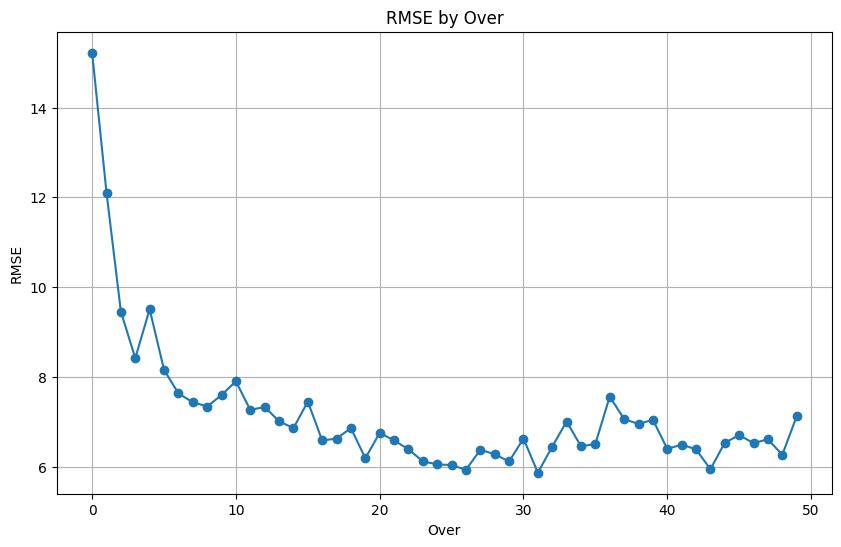

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(X['over'].unique(), rmses, marker='o')
plt.title('RMSE by Over')
plt.xlabel('Over')
plt.ylabel('RMSE')
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

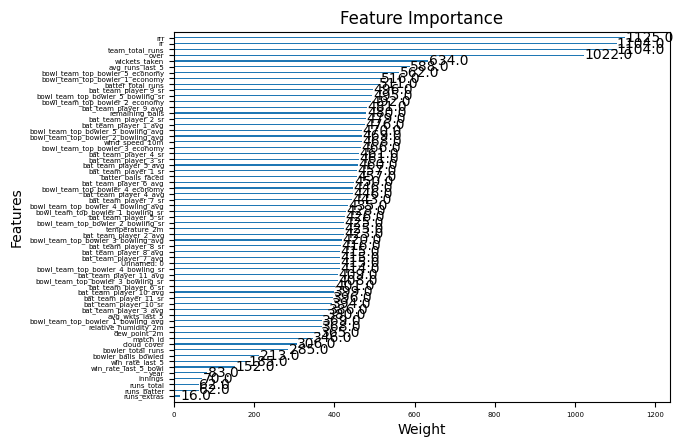

In [12]:
# plot the feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.xlabel('Weight')
plt.ylabel('Features')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.grid()
plt.show()